In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

from classification import IsLstmTsClassifier


def _load_data():
    """Load the data"""
    path = '/home/haseeb/resources/data/kth_thesis/room_2m_0.1ms/rnn_all/'

    """
    4 classes
    """
    X_train = np.load(path + '/train_data_75_4.npy')
    y_train = np.load(path + '/train_labels_75_4.npy')
    X_test = np.load(path + '/test_data_75_4.npy')
    y_test = np.load(path + '/test_labels_75_4.npy')
    
    return X_train, y_train, X_test, y_test

In [4]:
# load the data
X_train, y_train, X_test, y_test = _load_data()
print(X_train.shape)
# fit a model
classifier = IsLstmTsClassifier(drop_prob=0.5, num_layers=1, num_steps=7, hidden_size=100, max_iterations=1000, batch_size=10,
                                    eta=0.01, init_scale=0.08, max_grad_norm=25)
classifier.fit(X_train, y_train)

(132, 7, 5)
using the train data as validation set
Train with approximately 75 epochs
At 0 out of 1000 val cost is 1.043 and val acc is 0.800
At 100 out of 1000 val cost is 0.387 and val acc is 0.800
At 200 out of 1000 val cost is 0.028 and val acc is 1.000
At 300 out of 1000 val cost is 0.006 and val acc is 1.000
At 400 out of 1000 val cost is 0.000 and val acc is 1.000
At 500 out of 1000 val cost is 0.000 and val acc is 1.000
At 600 out of 1000 val cost is 0.001 and val acc is 1.000
At 700 out of 1000 val cost is 0.000 and val acc is 1.000
At 800 out of 1000 val cost is 0.000 and val acc is 1.000
At 900 out of 1000 val cost is 0.000 and val acc is 1.000
Converted 4 variables to const ops.
156 ops in the final graph.


In [5]:
print("Classifer.score()")
print(classifier.score(X_test, y_test))
predictions = classifier.predict(X_test)
logits = classifier.get_logits(X_test)

Classifer.score()
     Truth : [ 1.  1.  1.  0.  0.  2.  2.  2.  0.  0.  2.  1.  2.  2.  0.  2.  1.  0.
  0.  0.  2.  2.  0.  0.  1.  0.  0.  2.  1.  1.  1.  2.  0.  0.  0.  0.
  1.  1.  1.  1.  2.  1.  0.  0.]
Prediction : [ 1.  1.  2.  2.  0.  2.  0.  2.  0.  2.  2.  2.  2.  2.  0.  2.  2.  0.
  0.  0.  2.  2.  0.  0.  1.  0.  0.  2.  1.  2.  1.  2.  0.  0.  0.  2.
  1.  1.  1.  1.  2.  1.  0.  0.]
0.818181818182


In [6]:
print(logits.shape)

(44, 3)


In [7]:
print(range(1, np.unique(y_test).size + 1))

[1, 2, 3]


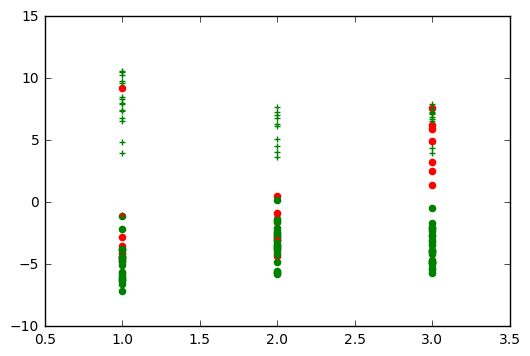

In [20]:
def plot_results(y, predictions, logits):
    plt.figure()
    classes = np.array(range(1, np.unique(y).size + 1))
    for i in range(logits.shape[0]):
        color = "g" if y[i] == predictions[i] else "r"
        plt.scatter(np.delete(classes, int(y[i])), np.delete(logits[i, :], int(y[i])), color=color, marker='o')
        plt.scatter(classes[int(y[i])], logits[i, int(y[i])], color=color, marker='+')
    plt.show()
plot_results(y_test[:], predictions, logits)

In [9]:
predictions_train = classifier.predict(X_train)
logits_train = classifier.get_logits(X_train)

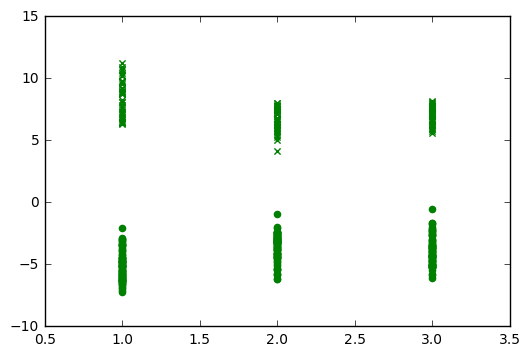

In [10]:
plot_results(y_train[:], predictions_train, logits_train)

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
print(y_test[:, 0].astype(int))
print(predictions.astype(int))

[1 1 1 0 0 2 2 2 0 0 2 1 2 2 0 2 1 0 0 0 2 2 0 0 1 0 0 2 1 1 1 2 0 0 0 0 1
 1 1 1 2 1 0 0]
[1 1 2 2 0 2 0 2 0 2 2 2 2 2 0 2 2 0 0 0 2 2 0 0 1 0 0 2 1 2 1 2 0 0 0 2 1
 1 1 1 2 1 0 0]


In [13]:
conf_mat = confusion_matrix(y_test[:,0], predictions)

In [14]:
print(conf_mat)

[[15  0  3]
 [ 0 10  4]
 [ 1  0 11]]


In [15]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[15  0  3]
 [ 0 10  4]
 [ 1  0 11]]


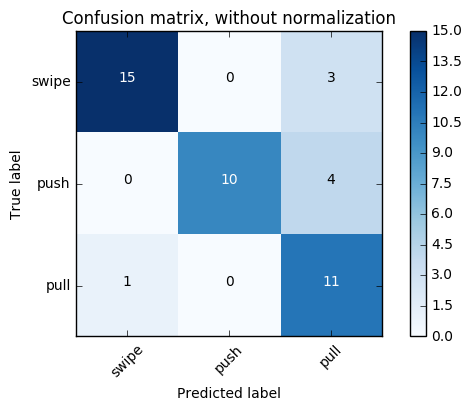

In [17]:
plt.figure()
plot_confusion_matrix(conf_mat, classes=['swipe', 'push', 'pull'],
                      title='Confusion matrix, without normalization')
plt.show()

In [21]:
X_train.shape

(132, 7, 5)

In [32]:
(y_train == 0).sum() + (y_train == 1).sum() + (y_train == 2).sum()

132

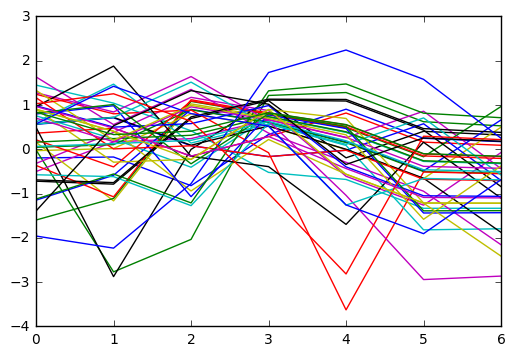

In [62]:
plt.figure()
plt.plot(X_train[np.argwhere(y_train == 1)[:, 0], :, 3].T)
plt.show()